# Topic-specific corpus building: The creation of a representative newspaper corpus on the topic of return migration using LDA and JSD

Sarah Oberbichler and Eva Pfanzelter (Institute of Contemporary History, University of Innsbruck)


In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
import gensim
from gensim.models import LdaModel
from gensim import models, corpora, similarities
import gensim.corpora as corpora
import gensim, spacy, logging, warnings
from gensim.models import CoherenceModel
from gensim.utils import lemmatize, simple_preprocess
import re
from nltk.stem.porter import PorterStemmer
import time
from nltk import FreqDist
from scipy.stats import entropy
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
import matplotlib.pyplot as plt
import spacy
import networkx as nx
import sys
import re, numpy as np, pandas as pd
from pprint import pprint

C:\Users\c62255\anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#### Abstract 
Many researchers have the problem that their specialized corpora, created by keyword searching, either contain texts that are irrelevant to their research question because search queries are too broad or, on the other hand, miss relevant text because the search requests are too narrow. The reason for this is to be found in the difficult nature of language, which is characterized by ambiguity and concepts that are difficult, if not impossible, to trace by a simple keyword search alone. This paper shows how a topic-specific corpus addressing return migration issues can be created with the help of Topic Modeling (LDA) and the Jensen-Shannon Distance (JSD) method. The aim is, on the one hand, to build a corpus that is as representative as possible and, on the other hand, to avoid complex keyword research that is often influenced by the researcher's prior knowledge. The paper furthermore highlights the necessity of corpus building and the critical evaluation in the heuristic research step.

## Introduction and related work

Historiography based on digital sources raises the need to increasingly search for complex patterns in masses of information rather than gaps in the historical record (Haber, 2012). This development has led to a certain hybridity of classical and digital methods in historical research (Fickers, 2020). This hybridity goes along with methodological and epistemological challenges for the historical sciences and calls for an extension of the historical method, which guides historical understanding through the three steps heuristics, source criticism and interpretation (Leyh, 1977). Especially the update on source criticism (which often goes hand in hand with tool criticism) has received much attention within the emerging field of digital hermeneutics (Fickers, 2020; Föhr, 2017; Koolen et al., 2019; Pfanzelter, 2010). Other parts of the historical method, like the relevance and critical assessment of adequate corpus creation in the heuristic research step, have so far not been considered enough.<br>
Historical research is often based on event- or topic-specific research questions, which is why specialized corpora hold an essential position in historical research. However, such corpora have to be created in time-consuming and complex processes. In addition, not every corpus is suitable for historical evaluation. Historical corpus-driven (qualitative but also qualitative) studies rely on the quality and representativeness of the selected collection in order to provide valid results. An important external criterion for corpus design and compilation is the quality of the sources. This refers, on the one hand, to the reliability of the sources and, on the other hand, to the (OCR) quality of the data (e.g., if retro-digitized sources are being used). A second important external criterion is the representativeness of the sources (Corpas Pastor and Seghiri, 2010). In the case of digitized newspapers, this includes the question whether the existing digitized newspapers are representative for the needs of the research project or if important newspapers issues are missing out. Internal criteria such as the number of documents in a collection, effect the quality and representativeness of topic-specific corpora as well (Corpas Pastor and Seghiri, 2010). <br>
When keywords are being used to create specialized collections, researchers often have to weight up between a collection that misses relevant articles, and one which contains noise (i.e. irrelevant texts). In other words, there is a conflict between creating a corpus that contains only relevant texts but not all relevant texts available in the entire collection and, on the other hand, creating a corpus that contains all available relevant texts, but at the expense of including many irrelevant texts (Chowdhury, 2010; Gabrielatos, 2007). This means there will be always a compromise between precision and recall when creating topic-specific corpora. <br>
However, there are a number of methods to improve the representativeness of specialized corpora. Search techniques such as Boolean queries from the area of information retrieval, for example, can be a great help to refine searches and to find relevant information. For the creation of topic-specific corpora, the search for texts containing specific information (e.g., a combination of words or a phrase) can impose bias (Chowdhury, 2004). Another method that draws on techniques used in information retrieval is the Relative Query Term Relevance (RQTR) method. RQTR is an approach to formulate a complex query for a topic-specific corpusa by calculating the degree of precision and recall of a query. This means that the RQTR method is based on the combination of keywords (candidate term and core query) calculating the relevance of the candidate term (e.g., the relevance of the term Hamas for the topic on refugees). If a candidate term has a clear positive RQTR score, it can add more relevant texts to a corpus. If the score is negative, it would add too much noise to a corpus (Gabrielatos, 2007). This approach can also be adapted to reduce the issue of polysemous (that is multi-part) and ambiguous query terms, as Daniel Malone (2020) suggested. In this case the RQTR method was used to find good keywords which were combined with an ambiguous search term to reduce the number of irrelevant articles. This method, however, can be very time-consuming and influenced by the researcher’s choice of candidate terms. Word Sense Disambiguation (WSD) is a further method that is meant to deal with ambiguous search terms. WSD methods assume that the context of texts can provide enough evidence on its own to disambiguate its meaning. WSD techniques can be knowledge-based (e.g., dictionaries), supervised (uses machine-learning technique from manually annotated data) or unsupervised. Unisupervised methods assume that similar senses occur in similar contexts. (Pal and Saha, 2015; Navigli 2009.) <br>
Based on this assumption, topic modeling and the Jensen-Shannon Distance (JSD) method were used to measure the similarity between newspaper clippings on return migration and furhter to classify them with the help of manually created annotations. It is assumed that text mining methods make the search less influenced by the researcher's prior knowledge and avoids a too narrow tunnel vision. Furthermore, this paper shows a new approach of using LDA and JSD in order to distinguish between relevant and irrelevant articles. The method calculates the probability of a newspaper article being relevant or not relevant to the research project. For this purpose, each individual newspaper article is compared with each other, while the manual annotations allow the assignment to one of the categories (relevant or irrelevant). The motivation of using this methods was to create a representative topic-specific corpus in order to be able to answer historical reseaech questions: Where return migrants welcomed or perceived as a burden and thread when returning back to their country of origin? Can differences between groups of returning migrants be identified and have there been changes over the time? How did returnees depict themselves?


## Creating a newspaper corpus on historical return migration movements 

### The motivation 
The main motivation for studying issues related to historical return migration processes was the need to produce empirical material on a topic that has been rarely researched so far. Return migration or remigration can generelly be defined as “cross-border migration to the country of origin” (Currle, 2006) or as the return of a person to the country of origin after spending a longer period of time abroad, even though no consistent definition exists within research literature. The return of emigrated people has, however, always been part of every migration movement – also in recent times. Examples include the return from overseas in the 19th and 20th century, the return of war veterans or the repatriation of war refugees during and after the First World War, or the return and repatriation of prisoners of war, refugees, exiles, concentration camp survivors, etc. during and after the Second World War. <br>
In scientific literature, migration was often viewed as a one-way process, beginning with the ‘uprooting’ of people at the point of origin and ending with ‘assimilation’ into their adopted culture and country. Annemarie Steidl et al. (2017) phrased this as follow: “Although temporary and circular migration patterns are of a special importance for European people in modern times, they were neglected by migration research for decades”. Still, recent research indicates that many people left their home countries with the notion of returning home at a certain point not so far in the future. This is also true for those who left their home voluntarily to resettle in other countries. Migration is therefore neither a linear process, nor is a model that goes in both directions appropriate. In many cases, emigrants returned only temporary and left their country of origin again after a while. <br>
Historical research on return migration considers such patterns of, and motivations for, return migration (Wyman, 2001), examines historical, political, sociological or economic backgrounds (Harper, 2012; Olivier, 2013; Poznan, 2017) or deals with autobiographical questions (Prager & Straub, 2017a). So far, however, the complexity and heterogeneity of sources about return migration (e.g., letters, photos, reports, statistical material on return, snippets of personal documentation, interviews, newspaper reporting) has complicated a structured analysis of the topic of return migration. The historical constellations were so diverse that generalizations are difficult to make and thus inherently faulty. What adds to the difficulties is the lack of empirical material. For example, it can still only be roughly estimated how many people who have emigrated voluntarily or involuntarily returned to their home countries (Prager & Straub, 2017b). The compilation of a corpus of empirical material (such as newspaper articles) is therefore still an essential factor if the topic of remigration is to be accessible for research. 


<table>
  <tr>
     <tr>
    <td>Figure 1: Das interessante Blatt, 12.12.1907, p. 1. </td>
    <td>Figure 2: Völkischer Beobachter, 15.10.19140, p. 3.</td>
  </tr>
    <td>
      <img src="images/return_migration.PNG" alt="Drawing" style="width: 400px";>
    </td>
    <td>
      <img src="images/rückwanderer.PNG" alt="Drawing" style="width: 400px;">
    </td>
    <td>


</table>





### The challenges

As mentioned above, keyword searches often return results that include many non-relevant text or that exclude too many relevant texts. These effects are often related to to synonymy and polysemy, but not alone. Language ambiguity, word flecxions and concepts that do not equate to single words also play an essential role (Oberbichler and Pfanzelter, 2021).<br> 

Return migration as definde before and and the concepts associated with it are difficult to trace by keyword searches because of the following reasons:

1. Concept are difficult to find using single keywords: There are only a few clear terms such as “Rückkehrer”, “Heimkehrer” or “Rückwanderer” (all German terms for “returnee”) that lead to relevant articles on return migration. They only cover a small amount of the whole spectrum of return migration articles in newspapers. On the other hand, expanding the search by avoiding word combinations and using only typical words in a collection, such as “return” or “returning” on return migration, leads to a considerable number of irrelevant articles. 


2. Word flexions complicate the combination of search terms: The combination of keywords that occur together in a defined word distance (e.g., return migrants, returning emigrants, returning home, returning families, return of emigrants) is helpful but also involves a number of challenges. Firtly, it is difficult to find all kind of different combinations that would represent the topic in an adaquate way. Secondly, Additionally, even if it were possible to cover the topic of return migration in its entirety, many of the word combinations would lead again to results that are not relevant for the research project.  
<br> 
3. Same words have different meanings in different contexts (ambiguity): The process of identifying the actual meanings of words can be considered as one of the most challenging problems. The following texts show examples of relevant and non relevant articles on the topic of return migration found by using ambiguous search words (which means they have different meanings based on the context) such as "Heimkehr" (returning home) or "Rückkehr" (returning back). The first article contains the search term "Rückehr" and is about the return of an Austrian prisoner of war from Russia. This article is relevant for the present research project: 

In [2]:
import csv
df = pd.read_csv('export_remigration_06_06_2020_18_57.csv', usecols = ['text','relevancy'])
df['text'][77]

'— Freitag, 14. Juni 1935.\nLinhart ist österreichischer Staatsbürger geblieben, dadurch wurde ihm auch die Rückkehr\nmöglich. Eine Verfügung, die im Jahr 1923 getroffen wurde, besagte, daß alle ehemaligen\nKriegsgefangenen, die Staatsbürger ihres Heimatlandes bleiben wollten, dies melden müßten,\nda sie andernfalls als russische Staatsangehorige\nerklärt würden. Es gab zu dieser Zeit in Rußland noch viele ehemalige Gefangene, die in\nweltabgelegenen Dörfern hausten. Dorthin drang\nkeine Kunde von der neuen Bestimmung. Daraus erklärt es sich nach Linharts Mitteilungen,\ndaß'

The second articles writes about the homecoming ("Heimkehr") of students in their school holidays and can be seen as not useful for the reserach project on return migration. 

In [3]:
df['text'][54]

'In unserem Gymnasium gab es Schüler,\ndie wir die „Koststudenten“ nannten. Zumeist\nwaren sie die Söhne von Lehrern oder Landwirten aus der Umgebung und ihre Väter hatten\nihnen in unserer Stadt Quartiere gemietet. Für\ndiese Studenten hatten die Feste ihren besonderen Zauber, denn Ferien bedeuteten für sie\nHeimkehr ins Elternhaus nach langer Trennung. Je näher der Tag der Erlösung heranrückte, um so ungeduldiger wurden sie. Und\nwar dann die Stunde da, in der sich das Schultor hinter uns schloß, dann sausten sie dem\nBahnhof entgegen, auch wenn ihr Zug erst viel\nspäter ging.'

....

### Word Sense Disambiguation - A new Approach to Topic Todeling and the Jensen Shannon Distance method (JSD)

Concept searches can overcome some of the the mentioned challenges. They derive the actual meanings of the words, and their underlying concepts, rather than by simply matching character strings like keyword search technologies.

Topic Modeling (LDA) which automatically detects word and phrase patterns is used for various needs: understanding given topics in a corpus, getting a better insight into the type or genre of documents in a corpus (news, advertisement, etc.), capturing the evolution of topics and trends within multilingual collections (Zosa and Ganroth-Wilding, 2019), or finding the most similar documents from a corpus. Topic modeling is an unsupervised machine learning technique that automatically clusters word groups and similar expressions that best characterize a set of documents. Therefore, it is well suited for the classification of relevant and non-relevant texts using similarity measures.<br>

Topic modeling and Word Sense Disambiguation....

<br>
In order to use machine learning to support the building of a representative corpus on return migration, this process started with the creation of a manually annotated training and testing collection - containing relevant as well as non-relevant articles. This pre-annotaded dataset is important for the calcuation of the relevanvy-probability and to successfully distinguish between relevant and non-relevant articles. In total, 219 newspaper clippings have been collected using following search terms: "Rückkehr" (returning back), "Heimkehr" (returning home), "heimgekehrt*" ((people who) returned home), "Rückwanderer" (returnees), "Rückwanderung" (return migration), "Heimkehrer" (returnees), "heimkehrend*" ((people who) are returning). <br>
The search and the building of the sample collection was performed with the beta version of the <a href="https://platform.newseye.eu" target="_blank">NewsEye Platform</a> (Jean-Caurant & Doucet, 2020).  This platform allows to create and manage datasets as well as adding annotations to the dataset. As can be seen in Figure 1, a total number of 130 articles were manually annotated as relevant (by assigning the number 3) and 89 articles were annotated as irrelevant (by assigning the number 0). While creating and annotating the dataset, value was placed on the representativity of the collection (in covering all possible topics and time frames).

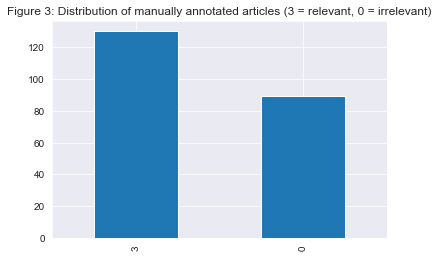

In [4]:
df.relevancy.value_counts().plot(kind='bar')
plt.title('Figure 3: Distribution of manually annotated articles (3 = relevant, 0 = irrelevant)')
plt.show()

Before the topic models were trained, the collection was pre-processed. In doing so, words were tokenized and stop words as well as too short articles (less then 30 tokens) were removed. After cleaning, the collection contained 203 items and the items themselves have an average length of 77 tokens. In a second step, the collection was divided into a training corpus and a test corpus, using a mask of binary values. This made it possible to have a good mix of relevant and non relevant articles in each of the corpora: 


In [5]:
# Functions to clean, tokenize, and lemmatize the data
def initial_clean(text):
    text = re.sub(r'[^\w\s]','',text)
    text = text.lower() 
    text = nltk.word_tokenize(text)
    return text

#Remove stop words
stop_words = stopwords.words('german')
# add stop words manually
stop_words.extend(["Heimkehr", "Rückkehr", "heimkehren", "zurückkehren", "a", "ab","aber","ach","acht","achte","achten","achter","achtes","ag","alle","allein","allem","allen","aller","allerdings","alles","allgemeinen","als","also","am","an","andere","anderen","andern","anders","au","auch","auf","aus","ausser","außer","ausserdem","außerdem","b","bald","bei","beide","beiden","beim","beispiel","bekannt","bereits","besonders","besser","besten","bin","bis","bisher","bist","c","d","da","dabei","dadurch","dafür","dagegen","daher","dahin","dahinter","damals","damit","danach","daneben","dank","dann","daran","darauf","daraus","darf","darfst","darin","darüber","darum","darunter","das","dasein","daselbst","dass","daß","dasselbe","davon","davor","dazu","dazwischen","dein","deine","deinem","deiner","dem","dementsprechend","demgegenüber","demgemäss","demgemäß","demselben","demzufolge","den","denen","denn","denselben","der","deren","derjenige","derjenigen","dermassen","dermaßen","derselbe","derselben","des","deshalb","desselben","dessen","deswegen","d.h","dich","die","diejenige","diejenigen","dies","diese","dieselbe","dieselben","diesem","diesen","dieser","dieses","dir","doch","dort","drei","drin","dritte","dritten","dritter","drittes","du","durch","durchaus","dürfen","dürft","durfte","durften","e","eben","ebenso","ehrlich","ei","ei,","eigen","eigene","eigenen","eigener","eigenes","ein","einander","eine","einem","einen","einer","eines","einige","einigen","einiger","einiges","einmal","eins","elf","en","ende","endlich","entweder","er","Ernst","erst","erste","ersten","erster","erstes","es","etwa","etwas","euch","f","früher","fünf","fünfte","fünften","fünfter","fünftes","für","g","gab","ganz","ganze","ganzen","ganzer","ganzes","gar","gedurft","gegen","gegenüber","gehabt","gehen","geht","gekannt","gekonnt","gemacht","gemocht","gemusst","genug","gerade","gern","gesagt","geschweige","gewesen","gewollt","geworden","gibt","ging","gleich","gott","gross","groß","grosse","große","grossen","großen","grosser","großer","grosses","großes","gut","gute","guter","gutes","h","habe","haben","habt","hast","hat","hatte","hätte","hatten","hätten","heisst","her","heute","hier","hin","hinter","hoch","i","ich","ihm","ihn","ihnen","ihr","ihre","ihrem","ihren","ihrer","ihres","im","immer","in","indem","infolgedessen","ins","irgend","ist","j","ja","jahr","jahre","jahren","je","jede","jedem","jeden","jeder","jedermann","jedermanns","jedoch","jemand","jemandem","jemanden","jene","jenem","jenen","jener","jenes","jetzt","k","kam","kann","kannst","kaum","kein","keine","keinem","keinen","keiner","kleine","kleinen","kleiner","kleines","kommen","kommt","können","könnt","konnte","könnte","konnten","kurz","l","lang","lange","leicht","leide","lieber","los","m","machen","macht","machte","mag","magst","mahn","man","manche","manchem","manchen","mancher","manches","mann","mehr","mein","meine","meinem","meinen","meiner","meines","mensch","menschen","mich","mir","mit","mittel","mochte","möchte","mochten","mögen","möglich","mögt","morgen","muss","muß","müssen","musst","müsst","musste","mussten","n","na","nach","nachdem","nahm","natürlich","neben","nein","neue","neuen","neun","neunte","neunten","neunter","neuntes","nicht","nichts","nie","niemand","niemandem","niemanden","noch","nun","nur","o","ob","oben","oder","offen","oft","ohne","Ordnung","p","q","r","recht","rechte","rechten","rechter","rechtes","richtig","rund","s","sa","sache","sagt","sagte","sah","satt","schlecht","Schluss","schon","sechs","sechste","sechsten","sechster","sechstes","sehr","sei","seid","seien","sein","seine","seinem","seinen","seiner","seines","seit","seitdem","selbst","sich","sie","sieben","siebente","siebenten","siebenter","siebentes","sind","so","solang","solche","solchem","solchen","solcher","solches","soll","sollen","sollte","sollten","sondern","sonst","sowie","später","statt","t","tag","tage","tagen","tat","teil","tel","tritt","trotzdem","tun","u","über","überhaupt","übrigens","uhr","um","und","und?","uns","unser","unsere","unserer","unter","v","vergangenen","viel","viele","vielem","vielen","vielleicht","vier","vierte","vierten","vierter","viertes","vom","von","vor","w","wahr?","während","währenddem","währenddessen","wann","war","wäre","waren","wart","warum","was","wegen","weil","weit","weiter","weitere","weiteren","weiteres","welche","welchem","welchen","welcher","welches","wem","wen","wenig","wenige","weniger","weniges","wenigstens","wenn","wer","werde","werden","werdet","wessen","wie","wieder","will","willst","wir","wird","wirklich","wirst","wo","wohl","wollen","wollt","wollte","wollten","worden","wurde","würde","wurden","würden","x","y","z","z.b","zehn","zehnte","zehnten","zehnter","zehntes","zeit","zu","zuerst","zugleich","zum","zunächst","zur","zurück","zusammen","zwanzig","zwar","zwei","zweite","zweiten","zweiter","zweites","zwischen","zwölf","euer","eure","hattest","hattet","jedes","mußt","müßt","sollst","sollt","soweit","weshalb","wieso","woher","wohin"])
def remove_stop_words(text):
    return [word for word in text if word not in stop_words]

#Stemming
stemmer = PorterStemmer()
def stem_words(text):
    try:
        text = [stemmer.stem(word) for word in text]
        text = [word for word in text if len(word) > 1] 
    except IndexError: 
        pass
    return text

#Apllying all functions 
def apply_all(text):
    return stem_words(remove_stop_words(initial_clean(text)))
df['tokenized'] = df['text'].apply(apply_all) 

# document length
df['doc_len'] = df['tokenized'].apply(lambda x: len(x))
doc_lengths = list(df['doc_len'])
df.drop(labels='doc_len', axis=1, inplace=True)

#Remove items that are too short: 
df = df[df['tokenized'].map(len) >= 30]
# make sure all tokenized items are lists
df = df[df['tokenized'].map(type) == list]
df.reset_index(drop=True,inplace=True)

#Show key data of the document
print(f"After cleaning and removint too short articles, the collection has a length of: {len(df)} articles")
print(f"The average document length is: {np.average(doc_lengths)}")
print(f"The minimum document length is: {min(doc_lengths)}")
print(f"The maximum document length is: {max(doc_lengths)}")

# Create a traininga and test corpus using a mask of binary values
msk = np.random.rand(len(df)) < 0.599

train_df = df[msk]
train_df.reset_index(drop=True,inplace=True)

test_df = df[~msk]
test_df.reset_index(drop=True,inplace=True)

print(f"The lenght of the training corpus is: {len(train_df)}")
print(f"The lenght of the test corpus is: {len(test_df)}")


After cleaning and removint too short articles, the collection has a length of: 203 articles
The average document length is: 77.10502283105023
The minimum document length is: 12
The maximum document length is: 296
The lenght of the training corpus is: 124
The lenght of the test corpus is: 79


The training corpus was used to train the topic modeling algorithm, the test corpus to retrieve similar articles in a later step. Latent Dirichlet Allocation (LDA) and the Jensen-Shannon Distance (JSD) method have been used to group words and similar expressions that best characterize relevant or irrelevant documents for the topic return migration and to measure the similarity between articles. The goal of using this method was to create a topic-specific corpus on return migration, which is representative and can be used for further, qualitative analysis. 
The combination of LDA and JSD to group similar articles, documents or groups of documents has been described in several research papers (Fothergill et al., 2016; Lu et al., 2019; Niekler & Jähnichen, 2012). What distinguishes this work is the motivation and the new way LDA and JSD were applied. 


In [6]:
def train_lda(data):
    num_topics = 250
    chunksize = 4000
    dictionary = corpora.Dictionary(data['tokenized'])
    corpus = [dictionary.doc2bow(doc) for doc in data['tokenized']]
    t1 = time.time()
    # low alpha means each document is only represented by a small number of topics, and vice versa
    # low beta means each topic is only represented by a small number of words, and vice versa
    lda = LdaModel(corpus=corpus, num_topics=num_topics, id2word=dictionary,
                   alpha=0.2e-2, eta=0.5e-2, chunksize=chunksize, minimum_probability=0.0, passes=50, iterations=200)
    t2 = time.time()
    print("Time to train LDA model on ", len(train_df), "articles: ", (t2-t1)/60, "min")
    return dictionary,corpus,lda
dictionary,corpus,lda = train_lda(train_df)

Time to train LDA model on  124 articles:  0.7030337691307068 min


The LDA was used to calculate the topic distribution of each article clipping in the training corpus. It has shown that for the topic on return migration, a high number of topics (250 in this case) leads to the better results. In order to see how well the dominant topics are separated between relevant (3) and non-relevant (0) articles, a network visualization was plotted using the Python packages Pandas and Networkx. For the network visualization, the most dominant topic for each newspaper clipping in the training corpus were calculated. This makes it possible to visualize relevant and non relevant newspaper cliüüings together with their dominant topics. This visualization helps to see how effective the models were trained. The fewer articles share the same dominant topic, the better the results: 

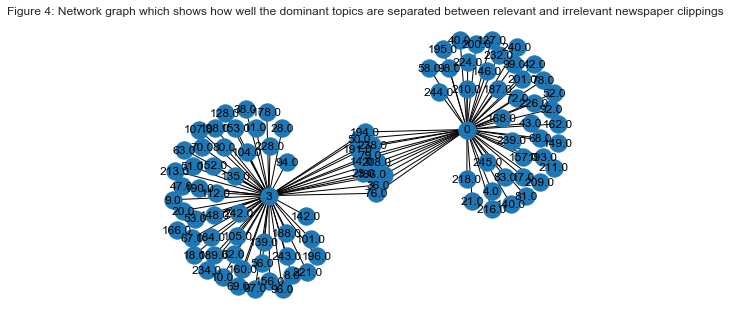

In [7]:
def format_topics_sentences(ldamodel=None, corpus=corpus, relevancy=df['relevancy']):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        for s, (topic_num, prop_topic) in enumerate(row):
            if s == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add relevancy to the end of the output
    contents = pd.Series(relevancy)
    
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=lda, corpus=corpus, relevancy=df['relevancy'])

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Relevancy']

df_dominant_topic.to_csv('topic_relevancy.csv')
import csv
with open('topic_relevancy.csv',  encoding="utf8") as infile:
    reader = csv.reader(infile)    
    csv_data = list(reader)
df_dominant_topics= pd.read_csv('topic_relevancy.csv', usecols = ['Dominant_Topic', 'Relevancy'])
list_topic = []
for key in csv_data: 
    list_topic.append(key[2])
topic = list_topic[1:]

list_relevancy = []
for key in csv_data:
    list_relevancy.append(key[5])
relevance = list_relevancy[1:]   
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Build a dataframe with 4 connections
df = pd.DataFrame({ 'from': relevance, 'to': topic})
df

# Build your graph
G = nx.from_pandas_edgelist(df, 'from', 'to')
# Plot it
nx.draw(G, with_labels=True)
plt.title('Figure 4: Network graph which shows how well the dominant topics are separated between relevant and irrelevant newspaper clippings')
plt.show()


The Jensen-Shannon Distance measures which documents are statistically “closer” (and therefore more alike) by comparing the divergence of their topic distributions. The smaller the distance, the more similar two articles are. Consequently, the topic distribution of each new article (from the test corpus) was compared to the topic distribution of all articles in the trained corpus. A long process of evaluation, reading the results and thinking about new application possibilities followed this work. The found solution was simple and exceedingly successful, but never used in this context so far: For each article in the test corpus, the ten most similar articles from the training corpus were extracted. These articles carry the information about the manually assigned relevancy. If 60 percent of the automatically found similar articles were annotated as relevant, the new article was marked as relevant, too. Otherwise it was marked as irrelevant.

<table><tr>
    <caption align="top">Figure 5: This example shows the recommendation of the ten most similar articles for one unseen article of the test corpus. The relevance levels tell whether the articles were manually classified as relevant or as irrelevant. </caption>
    <td> <img src="images/figure.PNG" alt="Drawing" style="width: 800px;"/> </td>
</tr></table>




This was working surprisingly well, as can be seen in the output and in the calculation of the score (precision):

.... 

In [8]:
def jensen_shannon(query, matrix):
    p = query[None,:].T 
    q = matrix.T 
    m = 0.5*(p + q)
    return np.sqrt(0.5*(entropy(p,m) + entropy(q,m)))
def get_most_similar_documents(query,matrix,k=10):
    sims = jensen_shannon(query,matrix) 
    return sims.argsort()[:k] 

#create lists for your output

text_relevant = []
number_relevant = []
text_non_relevant = []
number_non_relevant = []

#find most similar articles and select between relevant and non-relevant

index = 0
while index < len(test_df) -1:
    index +=1
    new_bow = dictionary.doc2bow(test_df.iloc[index,2])
    new_doc_distribution = np.array([tup[1] for tup in lda.get_document_topics(bow=new_bow)])
    doc_topic_dist = np.stack([np.array([tup[1] for tup in lst]) for lst in lda[corpus]])
    doc_topic_dist.shape
    most_sim_ids = get_most_similar_documents(new_doc_distribution,doc_topic_dist)
    most_similar_df = train_df[train_df.index.isin(most_sim_ids)]
    relevant = []
    if sum(most_similar_df['relevancy']) > 17: 
        text_relevant.append(test_df.iloc[index,1])
        number_relevant.append(test_df.iloc[index,0])
    else:
        text_non_relevant.append(test_df.iloc[index,1])
        number_non_relevant.append(test_df.iloc[index,0])
    pass

#Create a dataframe with the automatically selected relevant and non-relevant articles

df_relevant = pd.DataFrame(np.column_stack([text_relevant, number_relevant]), 
                               columns=['Relevant_Text', 'Real_Relevancy'])

df_non_relevant = pd.DataFrame(np.column_stack([text_non_relevant, number_non_relevant]), 
                               columns=['Unrelevant_Text', 'Real_Revelancy'])


df_results = pd.concat([df_relevant,df_non_relevant], ignore_index=True, axis=1)
df_results.columns=['Relevant_Text', '3','Non_Relevant_Text', '0']
df_results.head(20)

,Relevant_Text,3,Non_Relevant_Text,0
0,In dieser Lage trat zunächst auch durch die im...,3,Die geraubten Malvinen müssen wieder zurück!\n...,0
1,Wenn trotzdem süber die Behandlung der Heimkeh...,3,"Ein Jahr ist es der, seit der Führer den Gauen...",0
2,Die Abteikung „Reisen und Wandern“ erhielt im ...,3,"Der Stand der Sonne erinnerte Henriette daran,...",0
3,Nach Südamerika wanderten aus über Triest\nim ...,3,"Es ist so, als wollte ein verdientes Geschick ...",0
4,"ausenden täglich aus Rußland zurückkehren, sin...",3,doch unwiderruflich für alle Zukunft mein Lage...,0
5,Daß die Versorgung der Heimkehrenden in der\ne...,3,eigener Verwaltungsbezirk und als Selbstverwal...,0
6,Die Militärverwaltung hat sich von vornherein ...,3,"In unserem Gymnasium gab es Schüler,\ndie wir ...",0
7,"Das gesamte deutsche Volk, vorab wir im Gau Ti...",3,Besonders aussichtsreich sind die Zukunftsmögl...,0
8,(Nächtliche Ruhestörer.) Aus Lana berichtet ma...,0,Repertoire des Deutschen Volkstheaters. Samsta...,0
9,Ein großer Teil der bosnischen Rückwanderer — ...,3,Seit Harald Paulsen das Theater am Nollendorfp...,0


In [9]:
rev_3 = []
for key in df_results['3']:
    if key == '3':
        rev_3.append(key)
rev_0 = []
for key in df_results['3']:
    if key == '0':
        rev_0.append(key)
non_rev_3 = []
for key in df_results['0']:
    if key == '3':
        non_rev_3.append(key)
non_rev_0 = []
for key in df_results['0']:
    if key == '0':
        non_rev_0.append(key)
result_right = len(non_rev_0) + len(rev_3)
result_wrng = len(non_rev_3) + len(rev_0)
all_ = len(non_rev_3) + len(rev_0) + len(non_rev_0) + len(rev_3)
score = result_right / all_
f"Your score is: {score}"




'Your score is: 0.8333333333333334'

The goal of ... using the whole corpus ... 


In [10]:
df_all = pd.read_csv('export_remigration_all_04_06_2020_04_31.csv', usecols = ['id','language','date','newspaper_id','iiif_url','text'])
# Functions to clean, tokenize, and lemmatize the data
def initial_clean(text):
    text = re.sub(r'[^\w\s]','',text)
    text = text.lower() 
    text = nltk.word_tokenize(text)
    return text

stop_words = stopwords.words('german')
# add your onw stop words
stop_words.extend(["Heimkehr", "Rückkehr", "heimkehren", "zurückkehren", "a", "ab","aber","ach","acht","achte","achten","achter","achtes","ag","alle","allein","allem","allen","aller","allerdings","alles","allgemeinen","als","also","am","an","andere","anderen","andern","anders","au","auch","auf","aus","ausser","außer","ausserdem","außerdem","b","bald","bei","beide","beiden","beim","beispiel","bekannt","bereits","besonders","besser","besten","bin","bis","bisher","bist","c","d","da","dabei","dadurch","dafür","dagegen","daher","dahin","dahinter","damals","damit","danach","daneben","dank","dann","daran","darauf","daraus","darf","darfst","darin","darüber","darum","darunter","das","dasein","daselbst","dass","daß","dasselbe","davon","davor","dazu","dazwischen","dein","deine","deinem","deiner","dem","dementsprechend","demgegenüber","demgemäss","demgemäß","demselben","demzufolge","den","denen","denn","denselben","der","deren","derjenige","derjenigen","dermassen","dermaßen","derselbe","derselben","des","deshalb","desselben","dessen","deswegen","d.h","dich","die","diejenige","diejenigen","dies","diese","dieselbe","dieselben","diesem","diesen","dieser","dieses","dir","doch","dort","drei","drin","dritte","dritten","dritter","drittes","du","durch","durchaus","dürfen","dürft","durfte","durften","e","eben","ebenso","ehrlich","ei","ei,","eigen","eigene","eigenen","eigener","eigenes","ein","einander","eine","einem","einen","einer","eines","einige","einigen","einiger","einiges","einmal","eins","elf","en","ende","endlich","entweder","er","Ernst","erst","erste","ersten","erster","erstes","es","etwa","etwas","euch","f","früher","fünf","fünfte","fünften","fünfter","fünftes","für","g","gab","ganz","ganze","ganzen","ganzer","ganzes","gar","gedurft","gegen","gegenüber","gehabt","gehen","geht","gekannt","gekonnt","gemacht","gemocht","gemusst","genug","gerade","gern","gesagt","geschweige","gewesen","gewollt","geworden","gibt","ging","gleich","gott","gross","groß","grosse","große","grossen","großen","grosser","großer","grosses","großes","gut","gute","guter","gutes","h","habe","haben","habt","hast","hat","hatte","hätte","hatten","hätten","heisst","her","heute","hier","hin","hinter","hoch","i","ich","ihm","ihn","ihnen","ihr","ihre","ihrem","ihren","ihrer","ihres","im","immer","in","indem","infolgedessen","ins","irgend","ist","j","ja","jahr","jahre","jahren","je","jede","jedem","jeden","jeder","jedermann","jedermanns","jedoch","jemand","jemandem","jemanden","jene","jenem","jenen","jener","jenes","jetzt","k","kam","kann","kannst","kaum","kein","keine","keinem","keinen","keiner","kleine","kleinen","kleiner","kleines","kommen","kommt","können","könnt","konnte","könnte","konnten","kurz","l","lang","lange","leicht","leide","lieber","los","m","machen","macht","machte","mag","magst","mahn","man","manche","manchem","manchen","mancher","manches","mann","mehr","mein","meine","meinem","meinen","meiner","meines","mensch","menschen","mich","mir","mit","mittel","mochte","möchte","mochten","mögen","möglich","mögt","morgen","muss","muß","müssen","musst","müsst","musste","mussten","n","na","nach","nachdem","nahm","natürlich","neben","nein","neue","neuen","neun","neunte","neunten","neunter","neuntes","nicht","nichts","nie","niemand","niemandem","niemanden","noch","nun","nur","o","ob","oben","oder","offen","oft","ohne","Ordnung","p","q","r","recht","rechte","rechten","rechter","rechtes","richtig","rund","s","sa","sache","sagt","sagte","sah","satt","schlecht","Schluss","schon","sechs","sechste","sechsten","sechster","sechstes","sehr","sei","seid","seien","sein","seine","seinem","seinen","seiner","seines","seit","seitdem","selbst","sich","sie","sieben","siebente","siebenten","siebenter","siebentes","sind","so","solang","solche","solchem","solchen","solcher","solches","soll","sollen","sollte","sollten","sondern","sonst","sowie","später","statt","t","tag","tage","tagen","tat","teil","tel","tritt","trotzdem","tun","u","über","überhaupt","übrigens","uhr","um","und","und?","uns","unser","unsere","unserer","unter","v","vergangenen","viel","viele","vielem","vielen","vielleicht","vier","vierte","vierten","vierter","viertes","vom","von","vor","w","wahr?","während","währenddem","währenddessen","wann","war","wäre","waren","wart","warum","was","wegen","weil","weit","weiter","weitere","weiteren","weiteres","welche","welchem","welchen","welcher","welches","wem","wen","wenig","wenige","weniger","weniges","wenigstens","wenn","wer","werde","werden","werdet","wessen","wie","wieder","will","willst","wir","wird","wirklich","wirst","wo","wohl","wollen","wollt","wollte","wollten","worden","wurde","würde","wurden","würden","x","y","z","z.b","zehn","zehnte","zehnten","zehnter","zehntes","zeit","zu","zuerst","zugleich","zum","zunächst","zur","zurück","zusammen","zwanzig","zwar","zwei","zweite","zweiten","zweiter","zweites","zwischen","zwölf","euer","eure","hattest","hattet","jedes","mußt","müßt","sollst","sollt","soweit","weshalb","wieso","woher","wohin"])
def remove_stop_words(text):
    return [word for word in text if word not in stop_words]

stemmer = PorterStemmer()
def stem_words(text):
    try:
        text = [stemmer.stem(word) for word in text]
        text = [word for word in text if len(word) > 1] # make sure we have no 1 letter words
    except IndexError: 
        pass
    return text

def apply_all(text):
    return stem_words(remove_stop_words(initial_clean(text)))

df_all['tokenized'] = df_all['text'].apply(apply_all) 

def jensen_shannon(query, matrix):
    p = query[None,:].T 
    q = matrix.T 
    m = 0.5*(p + q)
    return np.sqrt(0.5*(entropy(p,m) + entropy(q,m)))

def get_most_similar_documents(query,matrix,k=10):
    sims = jensen_shannon(query,matrix) # list of jensen shannon distances
    return sims.argsort()[:k] # the top k positional index of the smallest Jensen Shannon distances

#create lists for your output
text_relevant = []
number_relevant = []
date_relevant = []
text_non_relevant = []
number_non_relevant = []
language_relevant = []
newspaper_id_relevant = []
iiif_url_relevant = []
id_relevant = []

#find most similar articles and select between relevant and non-relevant

index = 0
while index < len(df_all) -1:
    index +=1
    new_bow = dictionary.doc2bow(df_all.iloc[index,6])
    new_doc_distribution = np.array([tup[1] for tup in lda.get_document_topics(bow=new_bow)])
    doc_topic_dist = np.stack([np.array([tup[1] for tup in lst]) for lst in lda[corpus]])
    doc_topic_dist.shape
    most_sim_ids = get_most_similar_documents(new_doc_distribution,doc_topic_dist)
    most_similar_df = train_df[train_df.index.isin(most_sim_ids)]
    # Calculate 
    if sum(most_similar_df['relevancy']) > 17: 
        text_relevant.append(df_all.iloc[index,5])
        date_relevant.append(df_all.iloc[index,2])
        language_relevant.append(df_all.iloc[index,1])
        newspaper_id_relevant.append(df_all.iloc[index,3])
        iiif_url_relevant.append(df_all.iloc[index,4])
        id_relevant.append(df_all.iloc[index,0])
        
    else:
        text_non_relevant.append(df_all.iloc[index,5])
    pass
#transform your lists into a dataframe
df_relevant = pd.DataFrame(np.column_stack([text_relevant]), 
                               columns=['Relevant_Text'])

df_non_relevant = pd.DataFrame(np.column_stack([text_non_relevant]), 
                               columns=['Unrelevant_Text'])


df_results = pd.concat([df_relevant,df_non_relevant], ignore_index=True, axis=1)
df_results.columns=['Relevant_Text','Non_Relevant_Text']
df_results.head(5)
df_final = pd.DataFrame(np.column_stack([id_relevant, language_relevant, newspaper_id_relevant, date_relevant, iiif_url_relevant, text_relevant]), 
                               columns=['id', 'language', 'date', 'newspaper_id', 'iiif_url', 'text'])


df_new = pd.concat([df_final], ignore_index=True, axis=1)
df_new.columns=['id','language', 'date', 'newspaper_id', 'iiif_url', 'text']
df_new.head(5)

,id,language,date,newspaper_id,iiif_url,text
0,illustrierte_kronen_zeitung_krz19381218_articl...,de,illustrierte_kronen_zeitung,1938-12-18T00:00:00Z,https://platform.newseye.eu/iiif/illustrierte_...,"Alle Rückwanderer erhielten Gutscheine,\nmit d..."
1,innsbrucker_nachrichten_ibn19200226_article_960,de,innsbrucker_nachrichten,1920-02-26T00:00:00Z,https://platform.newseye.eu/iiif/innsbrucker_n...,* Amerikamüde infolge des Alkoholverbotes. Aus...
2,innsbrucker_nachrichten_ibn19180609_article_55,de,innsbrucker_nachrichten,1918-06-09T00:00:00Z,https://platform.newseye.eu/iiif/innsbrucker_n...,Eine Wäschebeschlagnahme? Das Kriegsfürsorgeam...
3,innsbrucker_nachrichten_ibn19390710_article_526,de,innsbrucker_nachrichten,1939-07-10T00:00:00Z,https://platform.newseye.eu/iiif/innsbrucker_n...,"Reichsamtsleiter Hoffmann, der aus Bremen stam..."
4,illustrierte_kronen_zeitung_krz19390807_articl...,de,illustrierte_kronen_zeitung,1939-08-07T00:00:00Z,https://platform.newseye.eu/iiif/illustrierte_...,"FLIEGER-GARTEN IX., Liechten- Heimkehr ins Glü..."


## Conclusion

...